In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import json
import pandas as pd
import io
import os
import requests
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
df = pd.read_csv('/content/final res-2.csv')

In [10]:
df

,isFake,userBiographyLength,userFollowerCount,userFollowingCount,userHasProfilPic,userIsPrivate,userMediaCount,usernameDigitCount,usernameLength
0,1,68,70,4332,0,1,331,5,5
1,1,122,78,3240,0,1,550,6,8
2,1,100,88,3415,0,1,245,5,17
3,0,129,92,4006,0,1,584,5,11
4,1,72,64,3192,0,1,317,6,12
...,...,...,...,...,...,...,...,...,...
83362,1,0,0,192,1,0,0,0,9
83363,1,0,6,116,1,0,0,0,7
83364,0,0,42,8,1,0,1,0,15
83365,1,0,12,109,1,0,0,0,10


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('isFake', axis=1), df['isFake'], test_size=0.3, random_state=101)

In [12]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)

[Text(0.42951207935577856, 0.9920634920634921, 'userFollowingCount <= 0.5\nsquared_error = 0.247\nsamples = 58356\nvalue = 0.442'),
 Text(0.16449801345790785, 0.9761904761904762, 'userBiographyLength <= 27.5\nsquared_error = 0.248\nsamples = 33545\nvalue = 0.461'),
 Text(0.009752507409123963, 0.9603174603174603, 'userIsPrivate <= 2.5\nsquared_error = 0.245\nsamples = 1549\nvalue = 0.569'),
 Text(0.0018885738745260052, 0.9444444444444444, 'isFake <= 16.5\nsquared_error = 0.157\nsamples = 292\nvalue = 0.805'),
 Text(0.0008198460230500487, 0.9285714285714286, 'usernameDigitCount <= 17.5\nsquared_error = 0.06\nsamples = 202\nvalue = 0.936'),
 Text(0.0006246445889905133, 0.9126984126984127, 'userFollowerCount <= 5041.5\nsquared_error = 0.052\nsamples = 199\nvalue = 0.945'),
 Text(0.00046848344174288495, 0.8968253968253969, 'userBiographyLength <= 14.5\nsquared_error = 0.044\nsamples = 195\nvalue = 0.954'),
 Text(0.0003904028681190708, 0.8809523809523809, 'squared_error = 0.0\nsamples = 111\

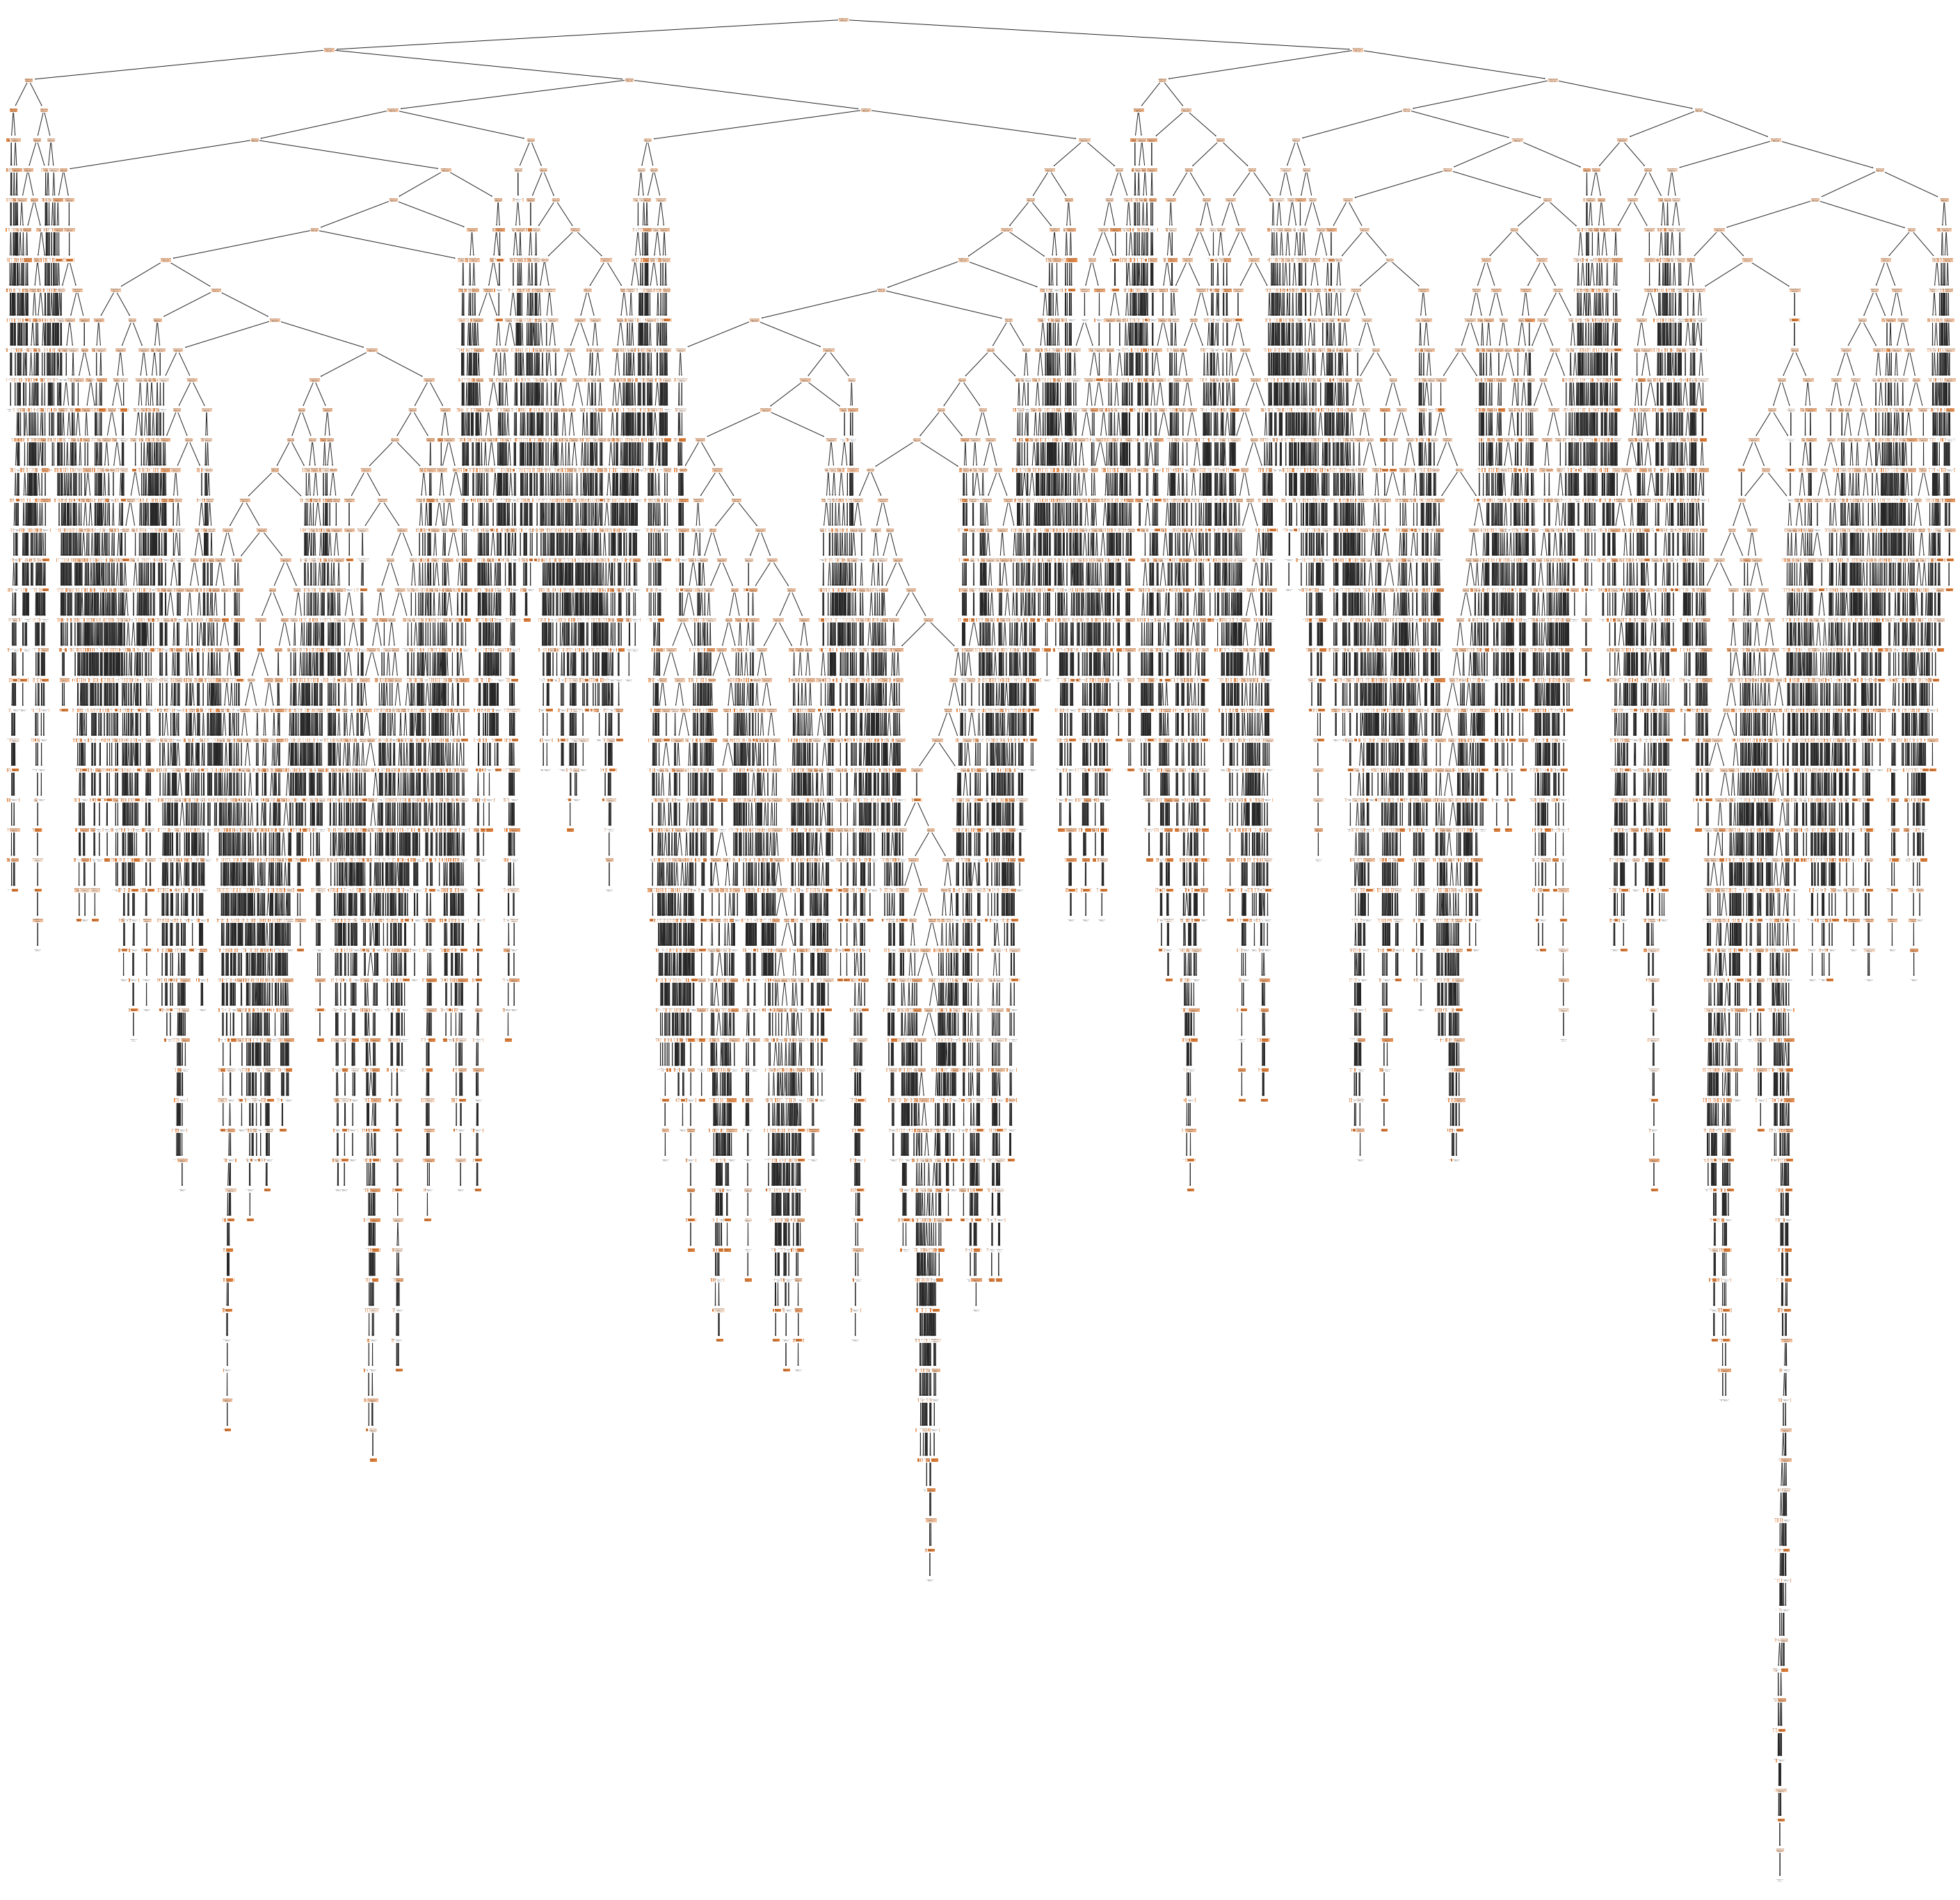

In [14]:
sns.set(rc={'figure.figsize': (50, 50)})
plot_tree(dtr,feature_names=df.columns[:-1], filled=True)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(predictions, y_test))
print("Mean Squared Error: ", mean_squared_error(predictions, y_test))
print("Root mean squared Error: ", np.sqrt(
    mean_squared_error(predictions, y_test)))

Mean Absolute Error:  0.49198352724801087
Mean Squared Error:  0.49198352724801087
Root mean squared Error:  0.7014153742597968


In [19]:
#LR
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [20]:
predict_lr=logreg.predict(X_test)

In [21]:
print("Mean Absolute Error: ", mean_absolute_error(predict_lr, y_test))
print("Mean Squared Error: ", mean_squared_error(predict_lr, y_test))
print("Root mean squared Error: ", np.sqrt(
    mean_squared_error(predict_lr, y_test)))

Mean Absolute Error:  0.4373275758666187
Mean Squared Error:  0.4373275758666187
Root mean squared Error:  0.6613074745280131


In [23]:
#RF
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
predict_rf=r.predict(X_test)

In [26]:
print("Mean Absolute Error: ", mean_absolute_error(predict_rf, y_test))
print("Mean Squared Error: ", mean_squared_error(predict_rf, y_test))
print("Root mean squared Error: ", np.sqrt(
    mean_squared_error(predict_rf, y_test)))

Mean Absolute Error:  0.4590780056775019
Mean Squared Error:  0.4590780056775019
Root mean squared Error:  0.6775529541500811


In [27]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier()

In [28]:
predict_xgb=xg.predict(X_test)

In [29]:
print("Mean Absolute Error: ", mean_absolute_error(predict_xgb, y_test))
print("Mean Squared Error: ", mean_squared_error(predict_xgb, y_test))
print("Root mean squared Error: ", np.sqrt(
    mean_squared_error(predict_xgb, y_test)))

Mean Absolute Error:  0.43484866658670185
Mean Squared Error:  0.43484866658670185
Root mean squared Error:  0.6594305623693081


In [30]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train,y_train)

SVC()

In [31]:
predict_svm=sv.predict(X_test)

In [32]:
print("Mean Absolute Error: ", mean_absolute_error(predict_svm, y_test))
print("Mean Squared Error: ", mean_squared_error(predict_svm, y_test))
print("Root mean squared Error: ", np.sqrt(
    mean_squared_error(predict_svm, y_test)))

Mean Absolute Error:  0.4401663268162009
Mean Squared Error:  0.4401663268162009
Root mean squared Error:  0.6634503197800126
